In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd

In [2]:
url = 'http://165.227.157.145:8080/api/do_measurement?x={}'
samples = []
for x in np.arange(-10.0, 10.0, 0.1):
    response = requests.get(url.format(x))
    samples.append(response.json()['data'])

In [3]:
df = pd.DataFrame.from_dict(samples)

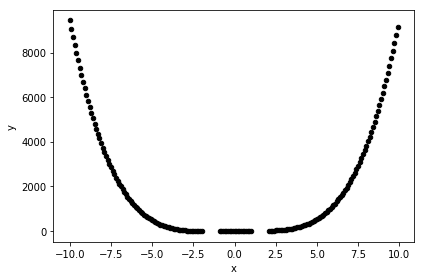

In [4]:
df.plot.scatter(x='x', y='y', c='k')
plt.tight_layout()

y = (0.9997266768360521 * x^4) + (-0.0015796152293503945 * x^3) + (-4.982417122189763 * x^2) + (5.083608329988982 * x^1) + (-5.991798601580711 * x^0)


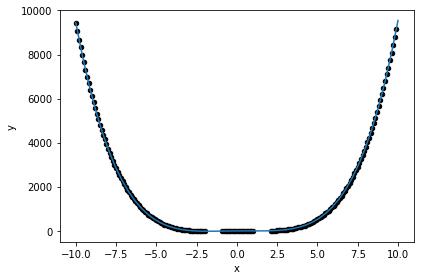

In [5]:
df = df.dropna()
x = np.linspace(-10, 10)
pf4 = np.polyfit(df['x'].tolist(), df['y'].tolist(), 4)

chart = df.plot.scatter(x='x', y='y', c='k')
chart.plot(x, np.polyval(pf4, x))
plt.tight_layout()
print('y = ' + ' + '.join(['({} * x^{})'.format(p, 4 - index) for index, p in enumerate(pf4)]))